In [26]:
source('K2methods.r')
library(purrr)
library(Rgraphviz)
library(bnlearn)

DF = data.frame(x1 = as.character(c(1, 1, 0, 1, 0, 0, 1, 0, 1, 0)), 
                x2 = as.character(c(0, 1, 0, 1, 0, 1, 1, 0, 1, 0)), 
                x3 = as.character(c(0, 1, 1, 1, 0, 1, 1, 0, 1, 0)), 
                stringsAsFactors = TRUE)
DF

x1,x2,x3
<fct>,<fct>,<fct>
1,0,0
1,1,1
0,0,1
1,1,1
0,0,0
0,1,1
1,1,1
0,0,0
1,1,1


In [27]:
trial = K2_algorithm(n = 3, u = 1, D = DF)
trial

[[1]]
[1] NA

[[2]]
[1] NA

[[3]]
[1] NA

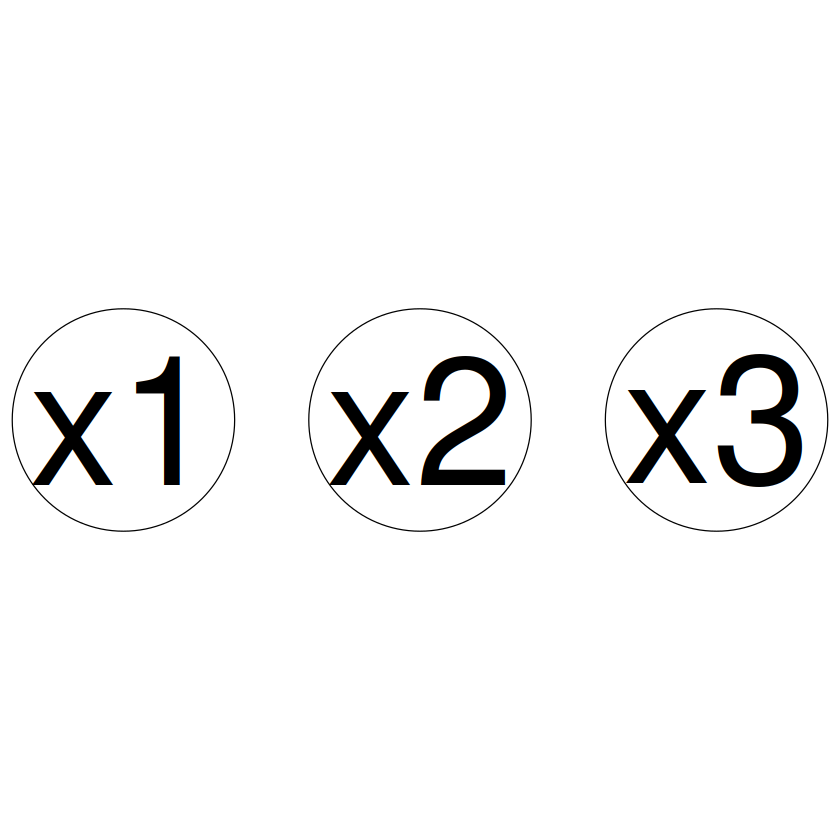

In [28]:
dag = get_dag(names(DF), trial)
graphviz.plot(dag)

In [29]:
bn_bayes = bn.fit(dag, data = DF, method = 'bayes', iss = 10)
bn_bayes


  Bayesian network parameters

  Parameters of node x1 (multinomial distribution)

Conditional probability table:
   0   1 
0.5 0.5 

  Parameters of node x2 (multinomial distribution)

Conditional probability table:
   0   1 
0.5 0.5 

  Parameters of node x3 (multinomial distribution)

Conditional probability table:
    0    1 
0.45 0.55 


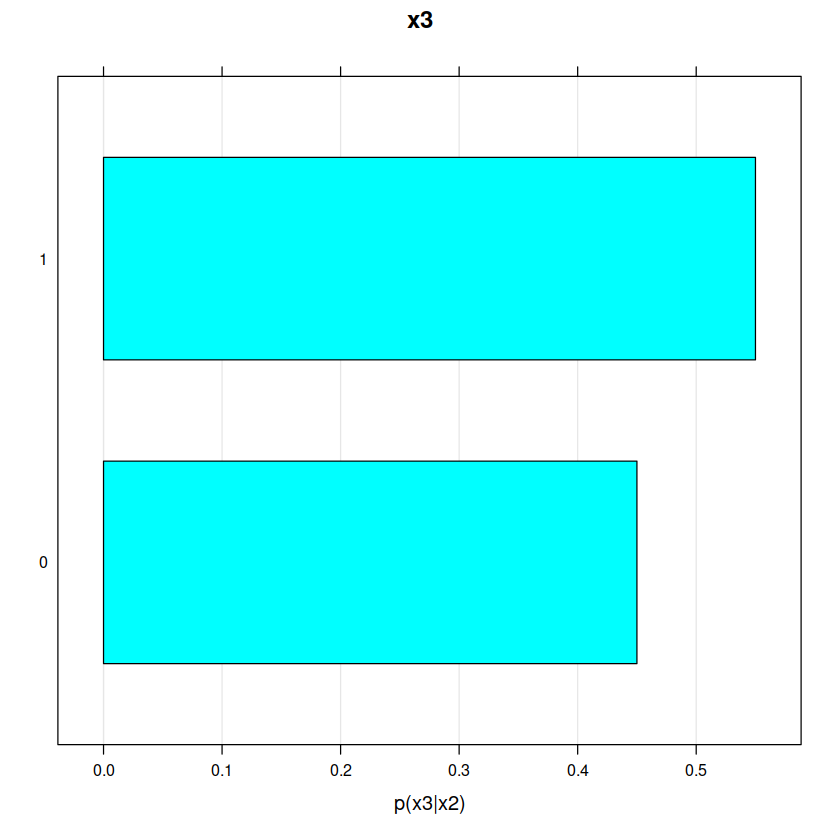

In [30]:
bn.fit.barchart(bn_bayes$x3, 'x3', xlab = 'p(x3|x2)', ylab = '')

In [31]:
# recall that when we make this test H_0 = (x, y) are independent
ci.test(x = 'x3', y = 'x2', z = 'x1', data = DF, test = 'mi')

# this shows that since the p-value is low, by 
# taking a 5% significance level we can reject the null 
# hyp and say that x3 and x2 depend on each other


	Mutual Information (disc.)

data:  x3 ~ x2 | x1
mi = 7.2355, df = 2, p-value = 0.02684
alternative hypothesis: true value is greater than 0


In [32]:
# this may say something about the structure we got through K2
ci.test(x = 'x1', y = 'x2', z = 'x3', data = DF, test = 'mi')


	Mutual Information (disc.)

data:  x1 ~ x2 | x3
mi = 2.6341, df = 2, p-value = 0.2679
alternative hypothesis: true value is greater than 0


In [33]:
# evaluate the score of our network
score(dag, data = DF, type = 'bic')
score(dag, data = DF, type = 'bde')

[1] -24.04694

[1] -24.79987